# Higher Degree Linear Regression Practice - Team Macro

## Imports + data collection and modification

### Importing necessary libraries

In [19]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

### Collecting local data

In [20]:
#array of dataframes
fullData = []

Price

In [21]:
# getting file locally
price = pd.read_csv("Price.csv", skiprows=4)

# to np array
data = price.to_numpy(np.dtype(datetime, float))

# setting column names
Pricedf = pd.DataFrame(data, columns=["Date", "Price"])

# putting columns to their respective type
Pricedf["Date"] = pd.to_datetime(Pricedf["Date"])
Pricedf["Price"] = pd.to_numeric(Pricedf["Price"])

# interpolating data to fill dates
Pricedf = Pricedf.resample('D', on='Date').mean()
Pricedf = Pricedf.interpolate(method='linear', axis=0)

# appending to whole
fullData.append(Pricedf)

Withdrawls

In [22]:
# getting file locally
withd = pd.read_csv("Withdrawls.csv", skiprows=105, nrows=505, usecols=[0, 1])

# to np array
withd = withd.to_numpy()

# to datetime
for j in range(len(withd)):
    withd[j][0] = datetime.strptime(withd[j][0], '%b-%Y')
    
# getting the first two value
ready4df = withd[:, [0, 1]]

# converting to dataframe
withddf = pd.DataFrame(ready4df, columns=["Date", "Withdrawal"])

# interpolating data to fill dates
withddf["Withdrawal"] = pd.to_numeric(withddf["Withdrawal"])
withddf = withddf.resample('D', on='Date').mean()
withddf = withddf.interpolate(method='linear', axis=0)

# appending to whole
fullData.append(withddf)

Working storage

In [23]:
# getting file locally
stordf1 = pd.read_csv("CSVngStorage.csv", skiprows=2)

# to np array
stor = stordf1.to_numpy()

# to datetime
for j in range(len(stor)):
        stor[j][0] = datetime.strptime(stor[j][0], "%d-%b-%y")
        
# getting the first two value
ready4df = stor[:, [0, 1]]

# converting to dataframe
stordf = pd.DataFrame(ready4df, columns=["Date", "Storage"])

# interpolating data to fill dates
stordf["Storage"] = pd.to_numeric(stordf["Storage"])
stordf = stordf.resample('D', on='Date').mean()
stordf = stordf.interpolate(method='linear', axis=0)

# appending to whole
fullData.append(stordf)

### concatenation of data

Dates are from 2011-02-01

In [24]:
data = np.array(fullData, dtype=object)
df = pd.concat(data, axis = "columns")
df = df.iloc[11323:14975, ]

In [25]:
train, test = train_test_split(df, test_size = .25, random_state = 0)

### Splitting data into sets and normalizing

In [26]:

y_train = train.loc[:,"Price"].to_numpy()
x_train = train.loc[:, train.columns != "Price"].to_numpy()
y_test = test.loc[:,"Price"].to_numpy()
x_test = test.loc[:, test.columns != "Price"].to_numpy()

array([[2.63160700e+06, 1.03385714e+03],
       [3.14262490e+06, 2.18114286e+03],
       [3.48036387e+06, 3.91300000e+03],
       ...,
       [2.73648061e+06, 3.01214286e+03],
       [3.00315910e+06, 1.38300000e+03],
       [3.19302829e+06, 2.30028571e+03]])

Scaling data

In [27]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)
y_train = scale.fit_transform(y_train.reshape(-1, 1))
y_test = scale.fit_transform(y_test.reshape(-1, 1))

<IPython.core.display.Javascript object>


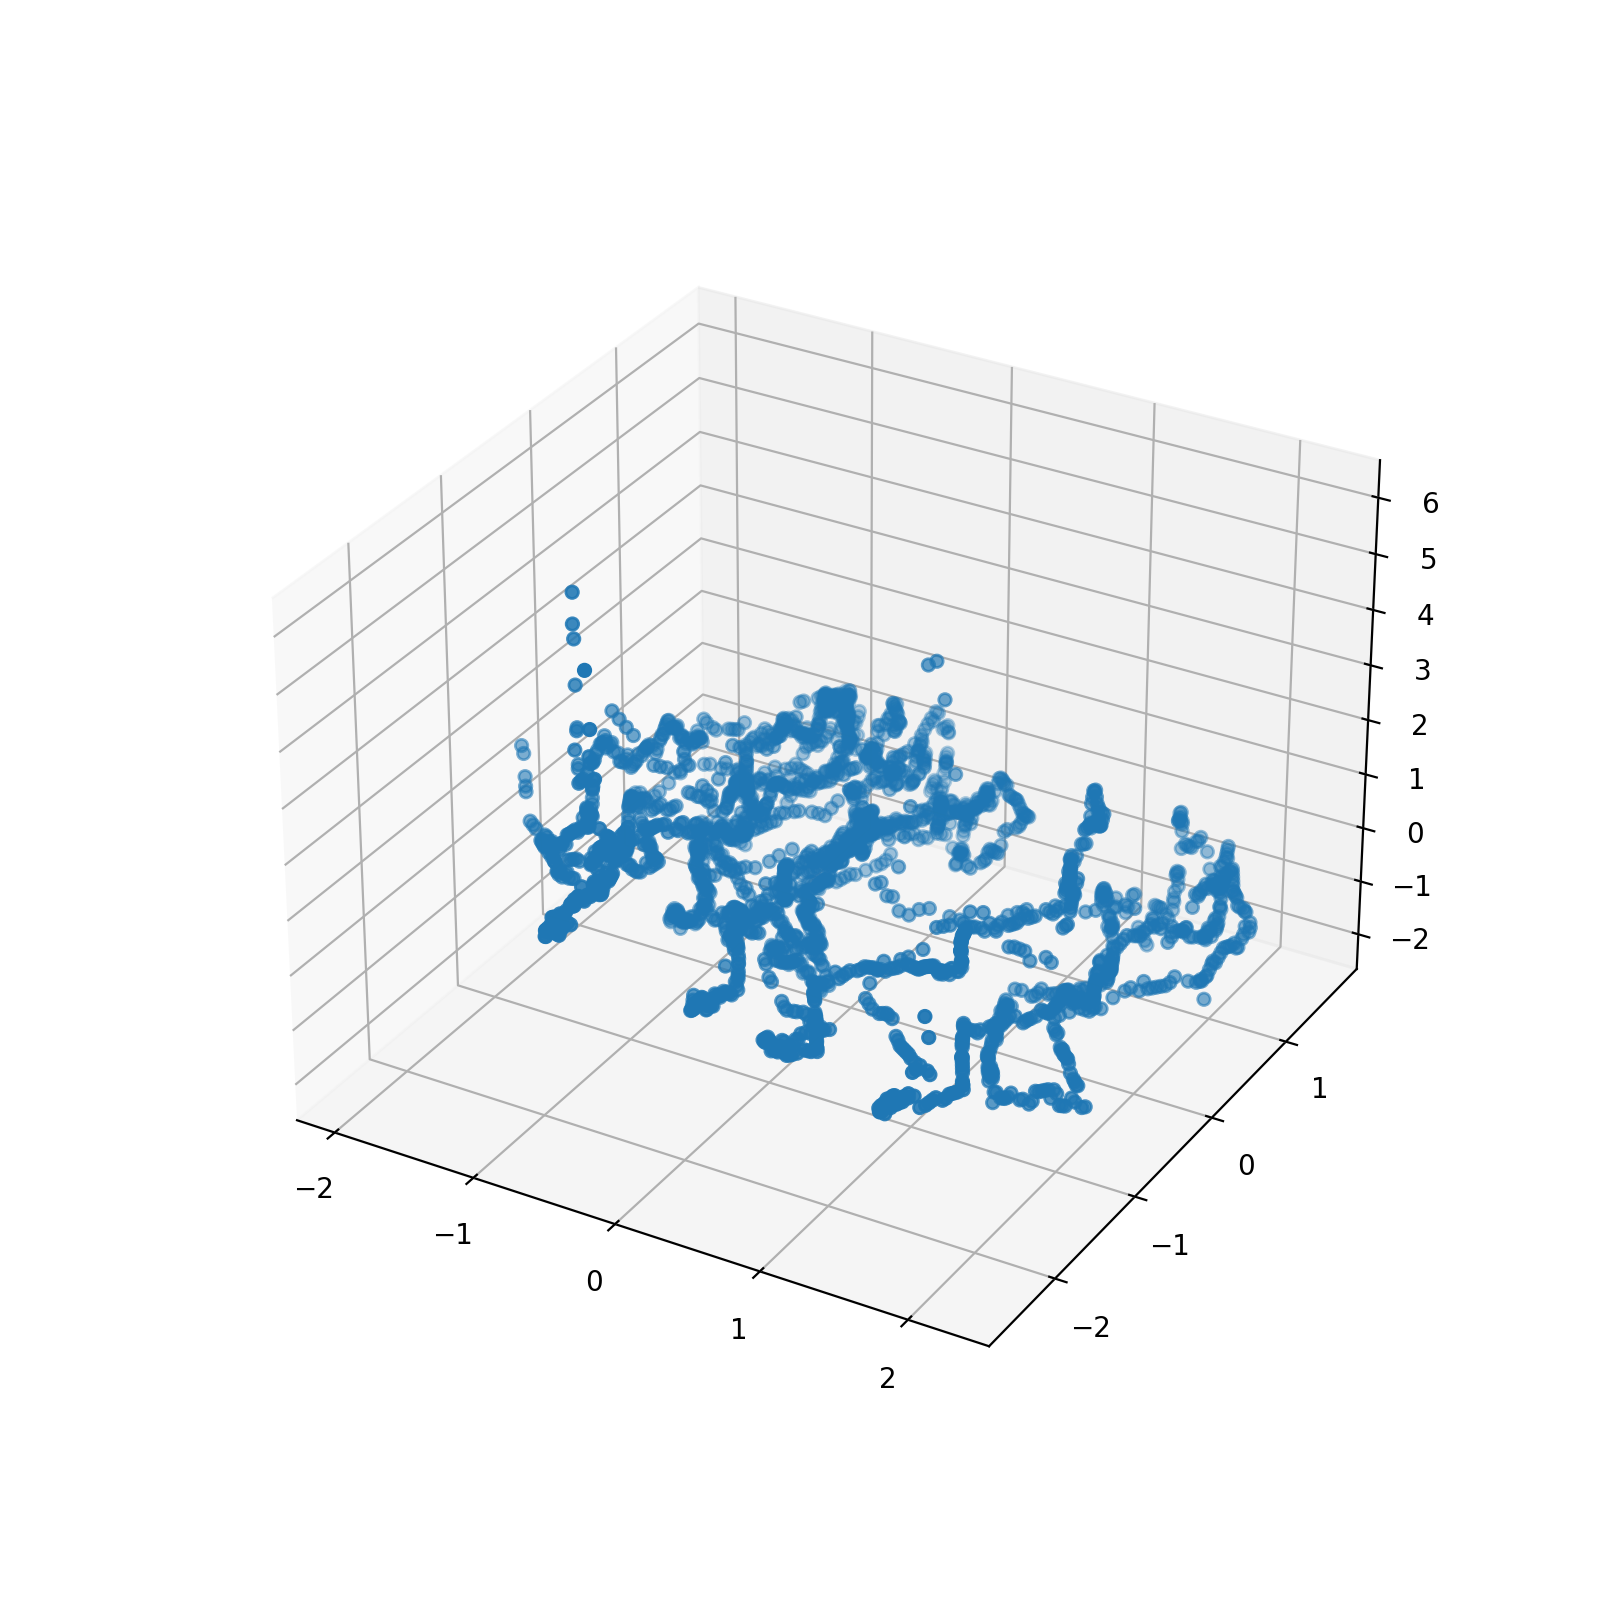

In [28]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(x_train[:,0], x_train[:,1], y_train)

## Polynomial Model

### setting up polynomial features of linear regression

To achieve a polynomial linear regression, you need to insert a polynomial feature as the input argument to a linear regression

In [29]:
poly = PolynomialFeatures(degree = 4, include_bias = False)

In [30]:
x_poly = poly.fit_transform(x_train)

In [31]:
poly.fit(x_train, y_train)

PolynomialFeatures(degree=4, include_bias=False)

In [32]:
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(poly.fit_transform(x_test))

<IPython.core.display.Javascript object>


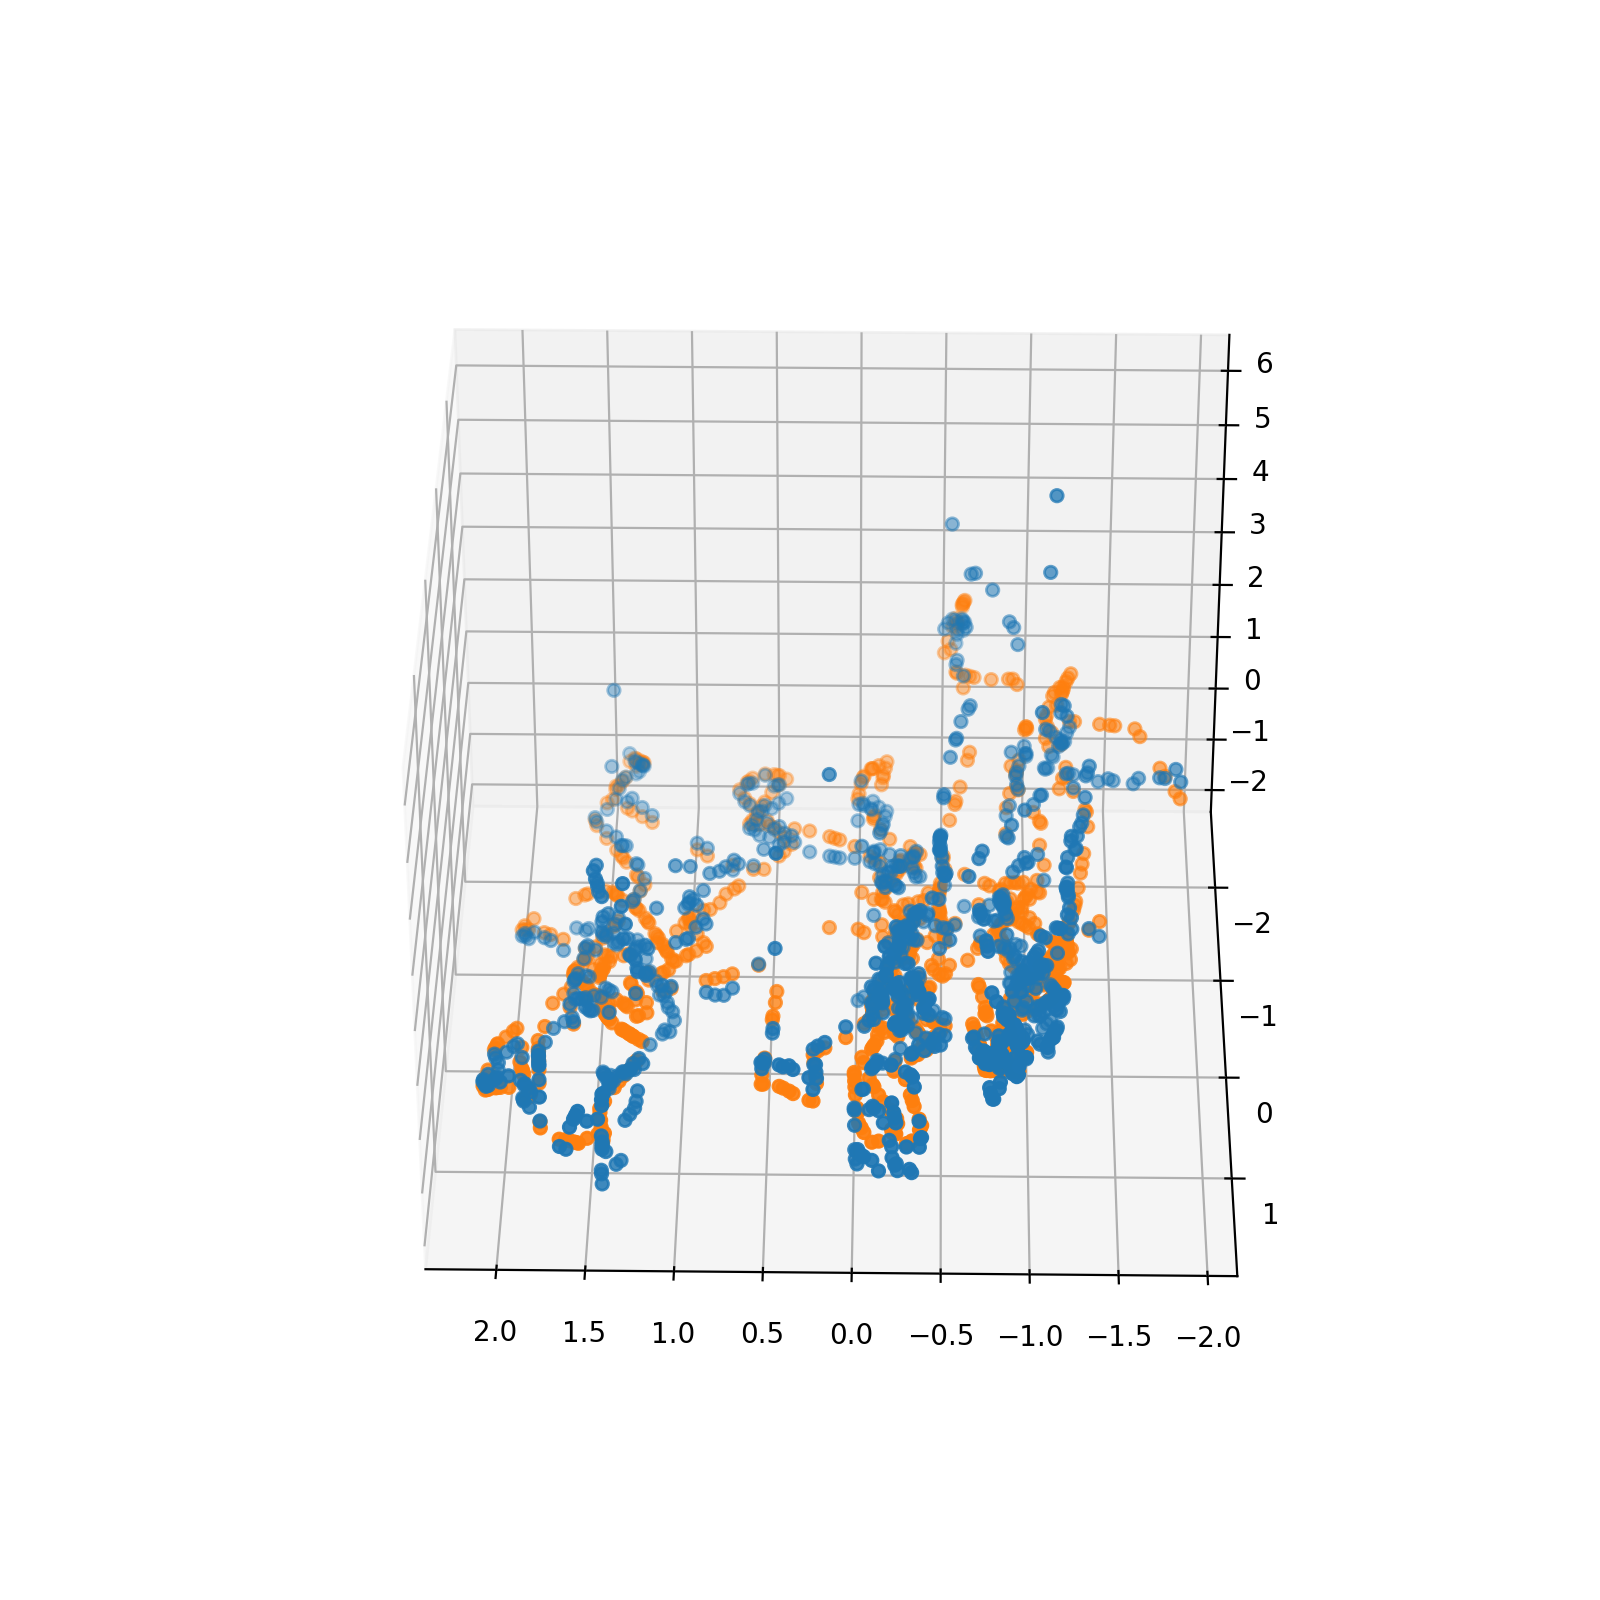

In [34]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(x_test[:,0], x_test[:,1], y_test)
ax.scatter(x_test[:,0], x_test[:,1], y_pred)